**линейный классификатор и правило Хэбба**  
метод градиентного спуска,  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [3]:
# собираем вместе
X = np.vstack(data)

In [4]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
y = y*2-1

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [6]:
%xdel data

In [7]:
# нормируем данные
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

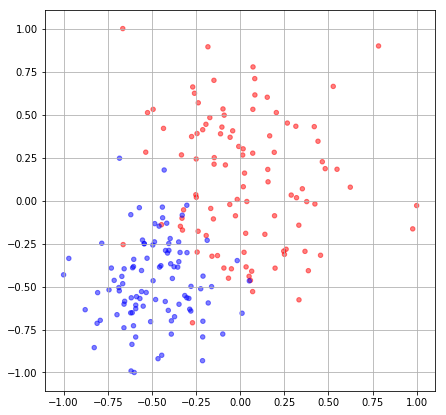

In [8]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [9]:
Xp = np.hstack([np.ones([X.shape[0],1]),X])
Xp.shape

(200, 3)

---

In [10]:
# from time import time
# def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)
# np.random.seed(get_seed())

In [11]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-0.03927224, -0.04028369,  0.09073401])

In [12]:
# O = np.sign(Xp.dot(W)) 
# O = Xp.dot(W) 
# L = -O*y
# L[y<0]=0
# L

In [13]:
def loss(o,y):
    L = -O*y
    # L[y<0]=0
    # return np.abs( L.sum() )
    return L.sum()   
    

In [14]:
# метод градиентного спуска

MAX_ITER = 55 # максимальное число циклов обучения
MIN_ERROR = 0.17 # порог минимальной ошибки

# a=0.1 # скорость обучения
a=1.0 # скорость обучения

er_hist = [] # история ошибки

In [15]:
for i in range(MAX_ITER):
    
    O = Xp.dot(W) # выход
    E = O-y # ошибка
    
    er_hist.append( loss(O,y) ) # значение ф-ции потери     
    
#     if er_hist[-1] < MIN_ERROR: # проверяем достижение порога
#         print(i,'min error ',er_hist[-1])
#         break
    
    f=O*y<0
    # dW = Xp[f,:].T.dot(y[f])
    dW = Xp[f,:].T.dot(np.sign(O[f]))
    
    dW = W+a*dW
   

In [16]:
print(W)
print(len(er_hist),er_hist[-1])

[-0.03927224 -0.04028369  0.09073401]
55 3.2890330052486147


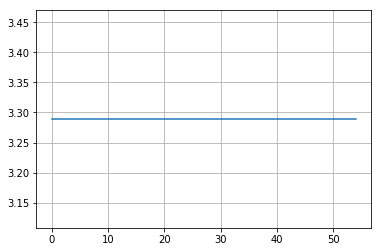

In [17]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [18]:
r = np.sign(Xp.dot(W)) 

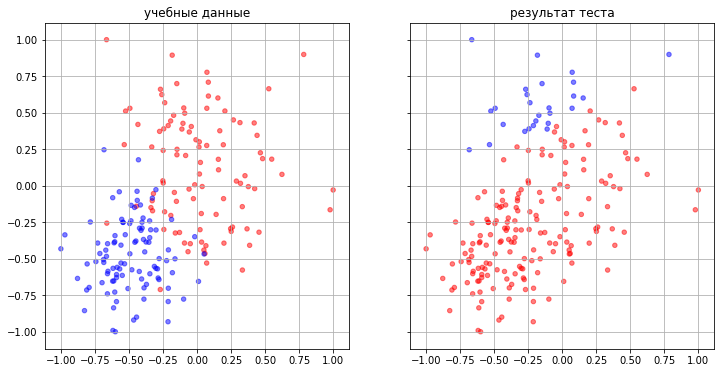

In [19]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in r ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
